## Specific Object Removal in videos using Dictionary Learning and Low-Rank Matrix Recovery

In [35]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from ksvd import ApproximateKSVD

In [47]:
# Set parameters for all required tools

# Image size
image_size = 8
dataset_size = 1000

In [48]:
# Generate images
# Initialize dataset
dataset = np.zeros((dataset_size, image_size, image_size))
# Generate images
for i in range(dataset_size):
    # Initialize image
    image = np.zeros((image_size, image_size))
    
    # Generate a corner of a square in the image randomly
    corner = np.random.randint(0, 4)
    # Generate a random position for the corner
    x = np.random.randint(0, image_size - 2)
    y = np.random.randint(0, image_size - 2)
    # Generate a random size for the square
    size = np.random.randint(1, image_size - max(x, y))
    # Add the square to the image
    if corner == 0:
        image[y:y+size, x:x+size] = 1
    elif corner == 1:
        image[y:y+size, x:x+size] = 1
    elif corner == 2:
        image[y:y+size, x:x+size] = 1
    else:
        image[y:y+size, x:x+size] = 1
    
    # Add image to dataset
    dataset[i] = image


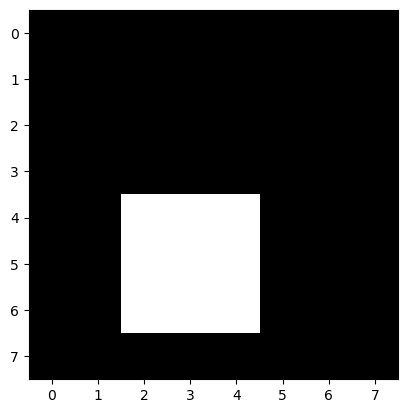

In [49]:
# Show a sample of the dataset
# Choose a sample
sample = 8
# Plot
plt.imshow(dataset[sample], cmap='gray')
plt.show()


In [40]:
# Flatten the dataset
dataset = dataset.reshape(dataset_size, image_size*image_size)
print(dataset.shape)

(10000, 2500)


### Training a dictionary to detect features of square objects in images using KSVD

In [33]:
'''
    KSVD Implementation
'''
# KSVD parameters
K = 100
T = 10
max_iter = 10
# Threshold for residual error
epsilon = 0.1

# Initialize dictionary
D = np.random.rand(image_size*image_size, K)
# Normalize dictionary
D = D / np.linalg.norm(D, axis=0)

# Initialize sparse representation
X = np.zeros((K, dataset_size))

# KSVD algorithm
for i in range(max_iter):
    print('Iteration:', i)
    # Sparse coding
    for j in range(dataset_size):
        # Solve the sparse coding problem
        # Initialize sparse representation
        x = np.zeros(K)
        # Initialize residual
        r = dataset[j]
        # Initialize index set
        Omega = np.zeros(K)
        # Iterate T times
        for t in range(T):
            # Find the best atom
            # Find the index of the atom with the maximum inner product
            k = np.argmax(np.abs(D.T @ r))
            # Update the index set
            Omega[k] = 1
            # Solve the least squares problem
            x = np.linalg.lstsq(D[:, Omega==1], dataset[j])
            print(x)
            # Update the residual
            print(dataset[j].shape, np.dot(D, x).shape)
            r = dataset[j] - D @ x
        # Update the sparse representation
        X[:, j] = x

    # Dictionary update
    for k in range(K):
        # Find the indices of the non-zero elements
        Omega = np.where(X[k, :] != 0)[0]
        # If the atom is used
        if len(Omega) > 0:
            # Update the atom
            # Update the k-th atom
            D[:, k] = 0
            # Compute the error
            E = dataset[Omega] - D @ X[:, Omega]
            # Update the atom
            D[:, k] = E @ X[k, Omega].T
            # Normalize the atom
            D[:, k] = D[:, k] / np.linalg.norm(D[:, k])
    
    # Compute the residual error
    E = dataset - D @ X
    error = np.linalg.norm(E)
    print('Residual error:', error)


Iteration: 0
(array([8.13719294]), array([815.78609108]), 1, array([1.]))


/var/folders/tr/x1sz6srs7j14qnlgnby6lnb00000gn/T/ipykernel_41989/1271233495.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(D[:, Omega==1], dataset[j])


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [43]:
# X ~ gamma.dot(dictionary)
X = dataset.T
aksvd = ApproximateKSVD(n_components=10000)
dictionary = aksvd.fit(X).components_
gamma = aksvd.transform(X)

KeyboardInterrupt: 